# ResNet on CIFAR-10
**This notebook: [see on github](https://github.com/drinkingkazu/2019-06-17-NeuralNets/blob/master/CIFAR-10%20ResNet.ipynb) or [run it on google colab](https://colab.research.google.com/github/drinkingkazu/2019-06-17-NeuralNets/blob/master/CIFAR-10%20ResNet.ipynb)**.

This notebook trains ResNet on CIFAR-10 dataset, 10 object classification in 32x32 pixels images with 3 channels. 

In [1]:
from __future__ import print_function
import matplotlib
%matplotlib inline
import torch
import numpy as np
SEED=123
_=np.random.seed(SEED)
_=torch.manual_seed(SEED)

We will use [`kworkshop.utils`](https://github.com/drinkingkazu/kworkshop/blob/master/utils) package. In case it's not available here, curl it.

In [2]:
! [ -d kworkshop ] || git clone -b 2019-06-17-NeuralNets https://github.com/drinkingkazu/kworkshop

# Prepare dataset

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


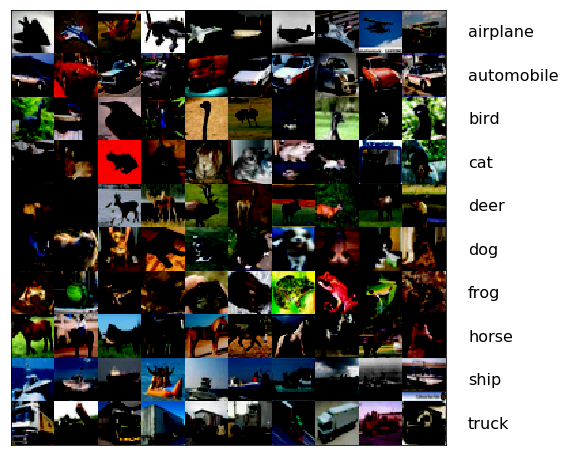

In [8]:
from torchvision import datasets, transforms
# Data file download directory
LOCAL_DATA_DIR = './data'
# Prepare train data
train_dataset = datasets.CIFAR10(LOCAL_DATA_DIR, train=True, download=True,
                                 transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=32,shuffle=True,num_workers=1,pin_memory=True)
# Prepare test data
test_dataset = datasets.CIFAR10(LOCAL_DATA_DIR, train=False, download=True,
                                transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=40,shuffle=False,num_workers=2,pin_memory=True)
# Visualize classes
from kworkshop.utils import plot_dataset
plot_dataset(train_dataset)

<a href="network"></a>
# Define a network

In [9]:
from kworkshop.resnet import ResNet

# Create Blob

In [10]:
class BLOB:
    pass
blob=BLOB()
blob.net       = ResNet(10,3,32,[2,2,2,2]).cuda() # construct Lenet, use GPU
blob.criterion = torch.nn.CrossEntropyLoss() # use softmax loss to define an error
blob.optimizer = torch.optim.Adam(blob.net.parameters(),weight_decay=0.001) # use Adam optimizer algorithm
blob.softmax   = torch.nn.Softmax(dim=1) # not for training, but softmax score for each class
blob.iteration = 0    # integer count for the number of train steps
blob.data      = None # data for training/analysis
blob.label     = None # label for training/analysis

<a href="train"></a>
# Train

In [ ]:
# Import train_loop, plot_loss
from kworkshop.utils import train_loop, plot_loss, save_state
# Train
plot_loss(train_loop(blob,train_loader,num_iteration=10000))
# Save
blob.weight_file=save_state(blob,prefix='./CIFAR10-ResNet')

# Evaluation

Train set accuracy mean 0.8014035508637236 std 0.06790418912952943


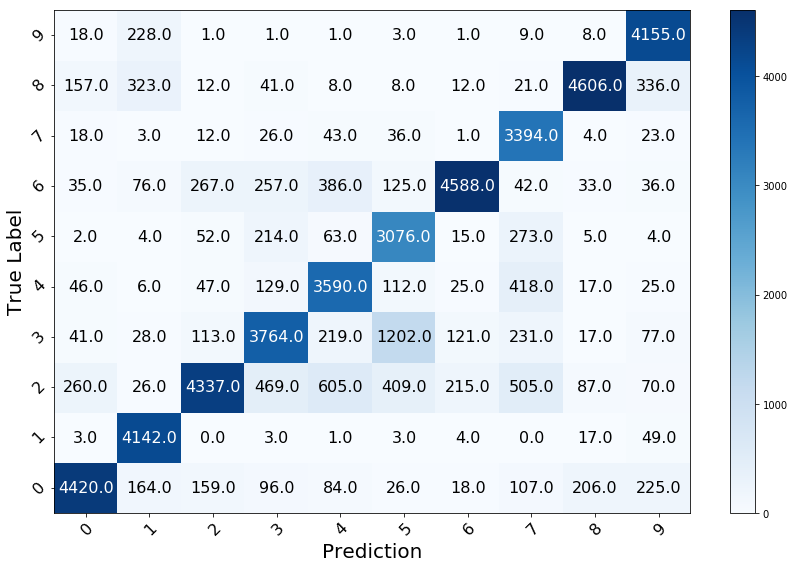

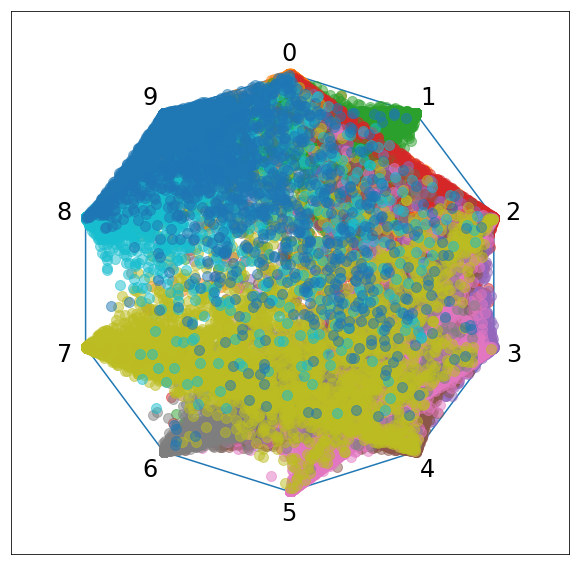

Test set accuracy mean 0.7519000000000001 std 0.06945422953283695


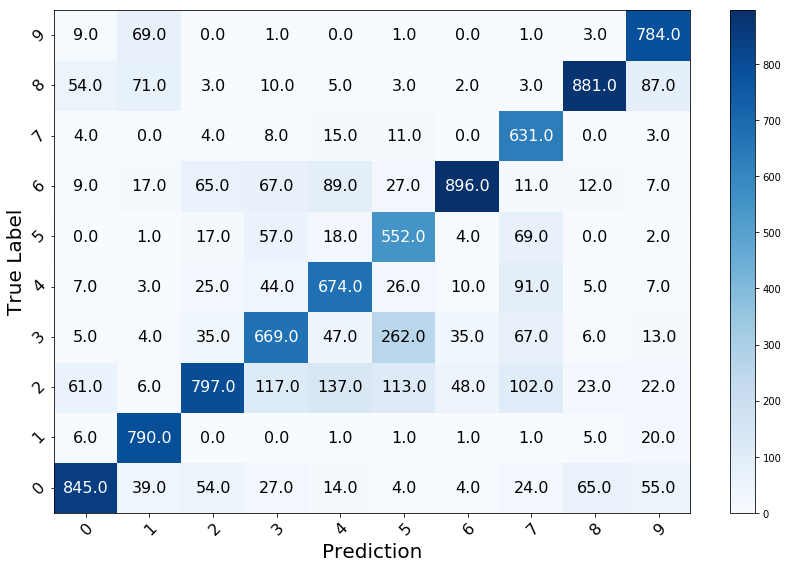

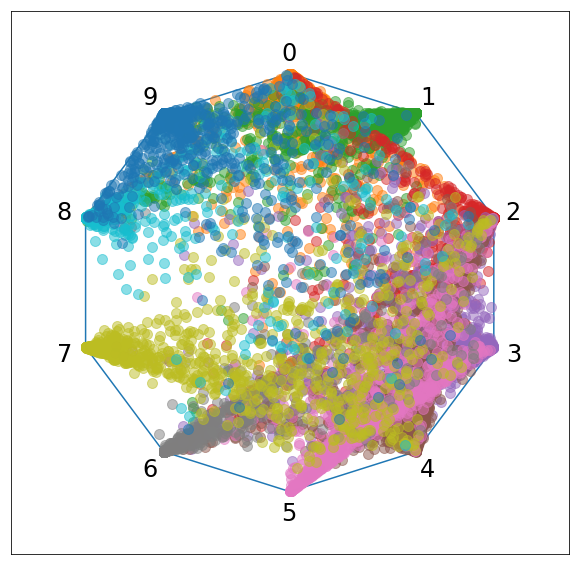

In [7]:
# For plotting a confusion matrix
from kworkshop.utils import inference_loop, plot_confusion_matrix, plot_softmax, restore_state

# Re-load the state if the weight_file is provided
if hasattr(blob,'weight_file') and blob.weight_file:
    restore_state(blob)

# For the Train set
accuracy, label, prediction, softmax = inference_loop(blob,train_loader,True)
print("Train set accuracy mean",accuracy.mean(),"std",accuracy.std())
plot_confusion_matrix(label,prediction,[str(d) for d in range(10)])
plot_softmax(label,softmax)

# For the Test set
accuracy, label, prediction, softmax = inference_loop(blob,test_loader,False)
print("Test set accuracy mean",accuracy.mean(),"std",accuracy.std())
plot_confusion_matrix(label,prediction,[str(d) for d in range(10)])
plot_softmax(label,softmax)